In [ ]:
#Importing the Necessary Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [ ]:
#Reading the Spreadsheet
sal_data=pd.read_csv("/workspaces/Codes-Please-/Salary_Prediction_ML_Project_02/dataset/Dataset09-Employee-salary-prediction.csv")
sal_data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [11]:
sal_data.shape

(375, 6)

In [ ]:
#Checking the column names
sal_data.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [ ]:
#Changing the columns names
sal_data.columns=['Age','Gender','Education_Level','Job_Title','Experience_Years','Salary']

In [14]:
sal_data.columns

Index(['Age', 'Gender', 'Education_Level', 'Job_Title', 'Experience_Years',
       'Salary'],
      dtype='object')

In [ ]:
#Checking if all the columns are in their proper dtypes
sal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               373 non-null    float64
 1   Gender            373 non-null    object 
 2   Education_Level   373 non-null    object 
 3   Job_Title         373 non-null    object 
 4   Experience_Years  373 non-null    float64
 5   Salary            373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [ ]:
#Checking for duplicate values
sal_data[sal_data.duplicated()]

,Age,Gender,Education_Level,Job_Title,Experience_Years,Salary
195,28.0,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
250,30.0,Female,Bachelor's,Junior Marketing Coordinator,2.0,40000.0
251,38.0,Male,Master's,Senior IT Consultant,9.0,110000.0
252,45.0,Female,PhD,Senior Product Designer,15.0,150000.0
253,28.0,Male,Bachelor's,Junior Business Development Associate,2.0,40000.0
254,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
255,44.0,Male,Bachelor's,Senior Software Engineer,14.0,130000.0
256,34.0,Female,Master's,Senior Financial Advisor,6.0,100000.0
257,35.0,Male,Bachelor's,Senior Project Coordinator,9.0,95000.0
258,50.0,Female,PhD,Director of Operations,22.0,180000.0


In [ ]:
#Dropping the duplicate values, only keeping the first occurence
sal_data1=sal_data.drop_duplicates(keep='first')

In [19]:
#Checking for null values
sal_data1.isnull().sum()

Age                 1
Gender              1
Education_Level     1
Job_Title           1
Experience_Years    1
Salary              1
dtype: int64

In [20]:
#Dropping missing values from dataset
sal_data1.dropna(how='any',inplace=True)

/tmp/ipykernel_3228/3320928202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1.dropna(how='any',inplace=True)


In [ ]:
#checking the new size
sal_data1.shape

(324, 6)

Data Exploration

In [23]:
sal_data1[['Age','Experience_Years','Salary']].corr()

,Age,Experience_Years,Salary
Age,1.000000,0.979192,0.916543
Experience_Years,0.979192,1.000000,0.924455
Salary,0.916543,0.924455,1.000000


In [24]:
sal_data1.describe()

,Age,Experience_Years,Salary
count,324.000000,324.000000,324.000000
mean,37.382716,10.058642,99985.648148
std,7.185844,6.650470,48652.271440
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.500000,9.000000,95000.000000
75%,44.000000,16.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [27]:
sal_data1['Education_Level'].value_counts()

Education_Level
Bachelor's    191
Master's       91
PhD            42
Name: count, dtype: int64

In [28]:
sal_data1['Job_Title'].value_counts()

Job_Title
Director of Operations            9
Director of Marketing             8
Senior Marketing Manager          8
Senior Project Manager            7
Senior Data Scientist             6
                                 ..
Junior Social Media Specialist    1
Junior Operations Coordinator     1
Senior HR Specialist              1
Director of HR                    1
Junior Financial Advisor          1
Name: count, Length: 174, dtype: int64

In [31]:
sal_data1['Job_Title'].value_counts()

Job_Title
Director of Operations            9
Director of Marketing             8
Senior Marketing Manager          8
Senior Project Manager            7
Senior Data Scientist             6
                                 ..
Junior Social Media Specialist    1
Junior Operations Coordinator     1
Senior HR Specialist              1
Director of HR                    1
Junior Financial Advisor          1
Name: count, Length: 174, dtype: int64

In [32]:
for i in sal_data['Job_Title']:
    print(i)

Software Engineer
Data Analyst
Senior Manager
Sales Associate
Director
Marketing Analyst
Product Manager
Sales Manager
Marketing Coordinator
Senior Scientist
Software Developer
HR Manager
Financial Analyst
Project Manager
Customer Service Rep
Operations Manager
Marketing Manager
Senior Engineer
Data Entry Clerk
Sales Director
Business Analyst
VP of Operations
IT Support
Recruiter
Financial Manager
Social Media Specialist
Software Manager
Junior Developer
Senior Consultant
Product Designer
CEO
Accountant
Data Scientist
Marketing Specialist
Senior Manager
Technical Writer
HR Generalist
Project Engineer
Customer Success Rep
Sales Executive
UX Designer
Operations Director
Network Engineer
Administrative Assistant
Strategy Consultant
Copywriter
Account Manager
Director of Marketing
Senior Scientist
Help Desk Analyst
Customer Service Manager
Business Intelligence Analyst
Event Coordinator
VP of Finance
Graphic Designer
Sales Manager
UX Researcher
Senior Engineer
Social Media Manager
Product 

In [34]:
def map_job_title(title):
    title = str(title).lower().strip()

    if 'software' in title or 'developer' in title or 'engineer' in title or 'architect' in title:
        return 'Software Engineer'
    elif 'data scientist' in title:
        return 'Data Scientist'
    elif 'data' in title:
        return 'Data Analyst'
    elif 'project' in title:
        return 'Project Manager'
    elif 'product' in title:
        return 'Product Manager'
    elif 'marketing' in title:
        return 'Marketing'
    elif 'sales' in title:
        return 'Sales'
    elif 'finance' in title or 'financial' in title or 'accountant' in title or 'account manager' in title:
        return 'Finance/Accounting'
    elif 'hr' in title or 'human resources' in title:
        return 'HR'
    elif 'analyst' in title:
        return 'Analyst'
    elif 'director' in title:
        return 'Director'
    elif 'manager' in title:
        return 'Manager'
    elif 'consultant' in title:
        return 'Consultant'
    elif 'recruiter' in title:
        return 'Recruiter'
    elif 'support' in title or 'help desk' in title:
        return 'IT Support'
    elif 'designer' in title or 'ux' in title or 'graphic' in title:
        return 'Designer'
    elif 'scientist' in title:
        return 'Scientist'
    elif 'assistant' in title:
        return 'Admin/Assistant'
    elif 'coordinator' in title:
        return 'Coordinator'
    elif 'operations' in title:
        return 'Operations'
    elif 'executive' in title or 'chief' in title or 'vp' in title or 'ceo' in title or 'principal' in title:
        return 'Executive'
    elif 'content' in title or 'writer' in title or 'copywriter' in title:
        return 'Content/Writer'
    elif 'business development' in title:
        return 'Business Development'
    elif 'research' in title:
        return 'Researcher'
    else:
        return 'Other'

# Apply the function to simplify job titles in-place
sal_data1['Job_Title'] = sal_data1['Job_Title'].apply(map_job_title)

# Optional: To see how many unique titles now
print("Unique simplified job titles:", sal_data1['Job_Title'].nunique())
print(sal_data1['Job_Title'].value_counts())

Unique simplified job titles: 25
Job_Title
Marketing               52
Finance/Accounting      34
Software Engineer       27
Manager                 26
Analyst                 25
HR                      21
Sales                   18
Product Manager         18
Project Manager         16
Director                15
Designer                 9
Data Scientist           8
Data Analyst             8
Scientist                7
Other                    7
Coordinator              6
IT Support               5
Business Development     4
Content/Writer           4
Recruiter                4
Consultant               3
Executive                3
Admin/Assistant          2
Operations               1
Researcher               1
Name: count, dtype: int64


/tmp/ipykernel_3228/3765571439.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1['Job_Title'] = sal_data1['Job_Title'].apply(map_job_title)


In [35]:
sal_data1.head()

,Age,Gender,Education_Level,Job_Title,Experience_Years,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


<Axes: ylabel='Age'>

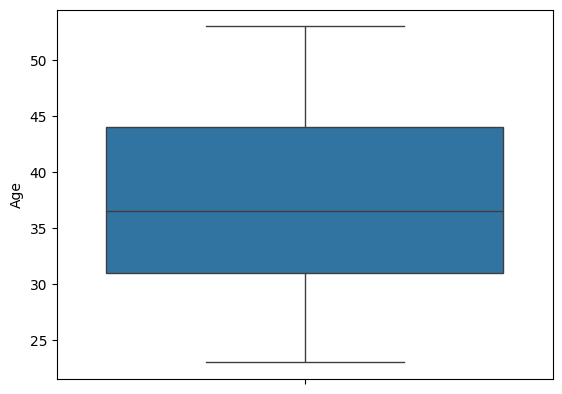

In [36]:
sns.boxplot(sal_data1['Age'])

<Axes: ylabel='Salary'>

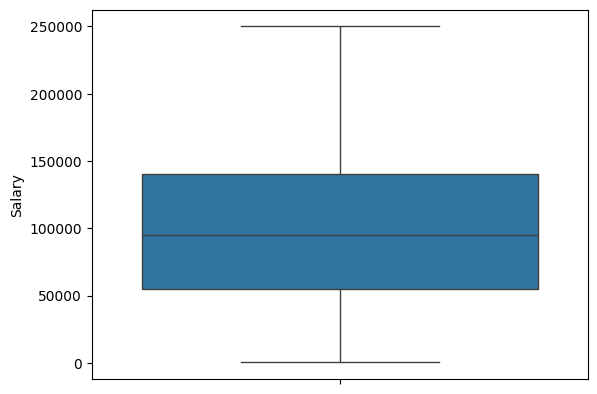

In [37]:
sns.boxplot(sal_data1['Salary'])

<Axes: ylabel='Experience_Years'>

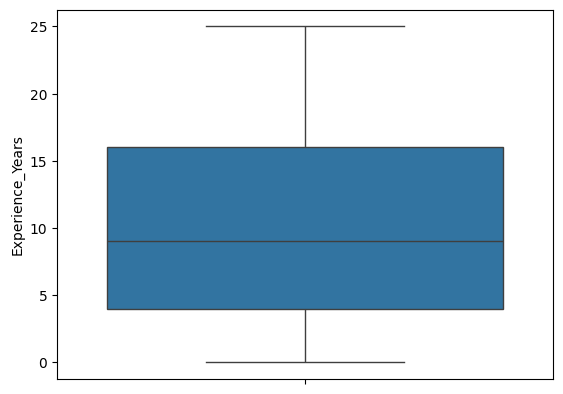

In [38]:
sns.boxplot(sal_data1['Experience_Years'])

In [39]:
sal_data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 324 entries, 0 to 371
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               324 non-null    float64
 1   Gender            324 non-null    object 
 2   Education_Level   324 non-null    object 
 3   Job_Title         324 non-null    object 
 4   Experience_Years  324 non-null    float64
 5   Salary            324 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


Training the model

In [40]:
X=sal_data1.drop(columns=['Salary'])
y=sal_data1['Salary']

In [41]:
X.head()

,Age,Gender,Education_Level,Job_Title,Experience_Years
0,32.0,Male,Bachelor's,Software Engineer,5.0
1,28.0,Female,Master's,Data Analyst,3.0
2,45.0,Male,PhD,Manager,15.0
3,36.0,Female,Bachelor's,Sales,7.0
4,52.0,Male,Master's,Director,20.0


In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [43]:
X.columns

Index(['Age', 'Gender', 'Education_Level', 'Job_Title', 'Experience_Years'], dtype='object')

In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import joblib
regression=LinearRegression()
numeric_features=['Age','Experience_Years']
categorical_features=['Gender','Education_Level','Job_Title']
preprocessor=ColumnTransformer(
    transformers=[
        ('numerical_features',StandardScaler(),numeric_features),
        ('categorical_features',OneHotEncoder(),categorical_features)
    ]
)

model_pipeline=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',regression)
])
model_pipeline.fit(X_train,y_train)
joblib.dump(model_pipeline,'model_pipeline.pkl')

['model_pipeline.pkl']

In [45]:
from sklearn.metrics import mean_absolute_error,r2_score
print("-----Train Performance------")
print("MAE: ",mean_absolute_error(y_train,model_pipeline.predict(X_train)))
print("R2-Score: ",r2_score(y_train,model_pipeline.predict(X_train)))
print("-----Test Performance------")
print("MAE: ",mean_absolute_error(y_test,model_pipeline.predict(X_test)))
print("R2-Score: ",r2_score(y_test,model_pipeline.predict(X_test)))

-----Train Performance------
MAE:  10458.604444485529
R2-Score:  0.9199188680028426
-----Test Performance------
MAE:  10371.592886061448
R2-Score:  0.8905219027946543


In [46]:
sal_data1['Salary'].mean()

np.float64(99985.64814814815)

In [47]:
sal_data1['Age'].max(),sal_data1['Experience_Years'].max()

(np.float64(53.0), np.float64(25.0))

In [50]:
sal_data1['Education_Level'].value_counts()

Education_Level
Bachelor's    191
Master's       91
PhD            42
Name: count, dtype: int64